<a href="https://colab.research.google.com/github/GasparQC/Analisis-Inmobiliaria/blob/main/AnalisisInmobiliaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Situación Ficticia:

Recientemente me he incorporado al equipo de Datos de una gran inmobiliaria. La
primera tarea que me asignaron es ayudar a los tasadores/as a evaluar las propiedades,
ya que es un proceso difícil y, a veces, subjetivo. Para ello, me propuse realizar un
análisis de los datos con Python que ayude a la inmobiliaria a tener un conocimiento
acabado del mismo para poder desarrollar la tarea minimizando al máximo el riesgo de
errores y poder tomar decisiones correctas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Carga el dataset usando Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [1]:
df = pd.read_csv('/content/drive/MyDrive/PracticasProfesionalisantes1/Inmobiliaria.csv')


NameError: name 'pd' is not defined

Valores Faltantes: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [ ]:
# Valores Faltantes: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.
valores_faltantes = df.isnull().sum()
print(valores_faltantes)

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


Tipos de propiedad: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. Pistas: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

property_type
Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: count, dtype: int64


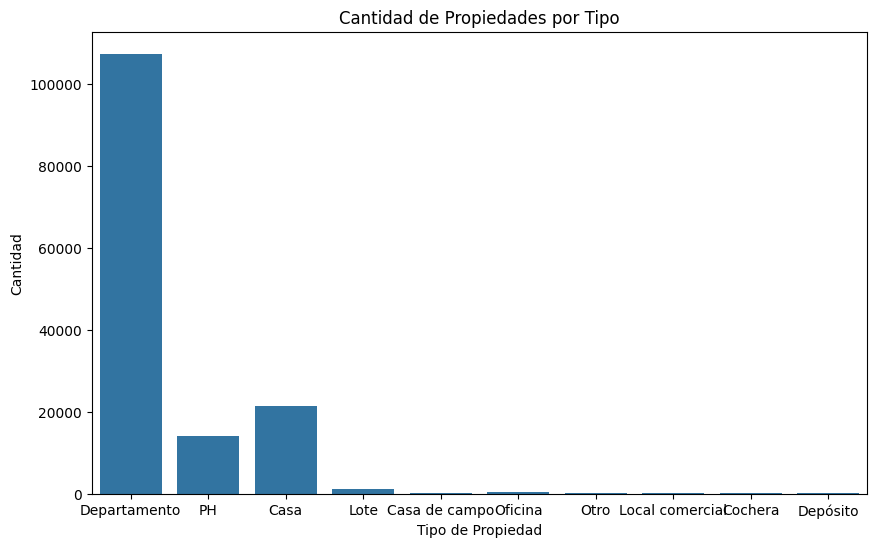

In [ ]:
# Tipos de propiedad: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. Pistas: Te puede ser útil googlear cómo rotar las etiquetas del eje x.
tipo_propiedad_counts = df['property_type'].value_counts()
print(tipo_propiedad_counts)
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
sns.countplot(x='property_type', data=df)
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad')
plt.title('Cantidad de Propiedades por Tipo')
plt.show()


¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables l2 y l3. Si te animas, puedes hacer los dos gráficos usando subplot de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

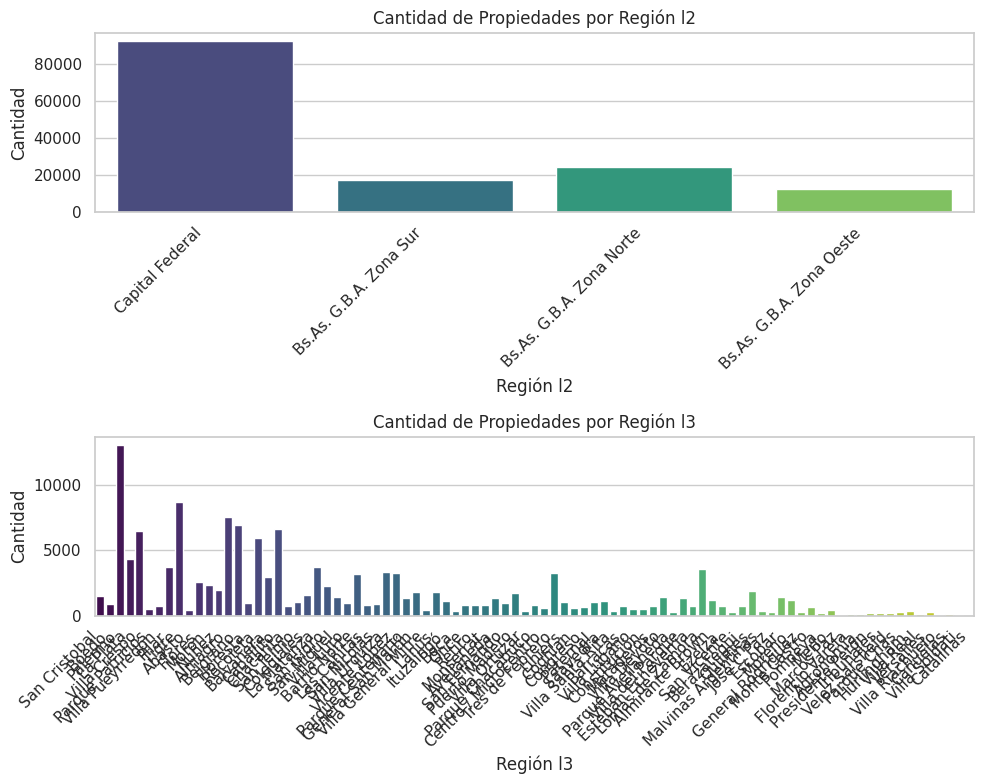

In [ ]:
sns.set(style="whitegrid")

# Crear una figura con un tamaño adecuado
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura si es necesario

plt.subplot(2, 1, 1)  # 1 fila, 2 columnas, primer gráfico
sns.countplot(x='l2', data=df, hue='l2', palette='viridis', legend=False)
plt.xlabel('Región l2')
plt.ylabel('Cantidad')
plt.title('Cantidad de Propiedades por Región l2')
plt.xticks(rotation=90, ha='right')  # Rotar las etiquetas del eje x

# Gráfico para l3
plt.subplot(2, 1, 2)  # 1 fila, 2 columnas, segundo gráfico
sns.countplot(x='l3', data=df, hue='l3', palette='viridis', legend=False)
plt.xlabel('Región l3')
plt.ylabel('Cantidad')
plt.title('Cantidad de Propiedades por Región l3')
plt.xticks(rotation=90, ha='right')  # Rotar las etiquetas del eje x

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()


Gráfico superior: Cantidad de Propiedades por Región I2

Capital Federal (CABA) tiene una cantidad significativamente mayor de propiedades, con más de 80,000.
Las zonas del Gran Buenos Aires (GBA) están divididas en tres áreas:
Zona Sur con una cantidad relativamente baja de propiedades.
Zona Norte presenta un número mayor de propiedades en comparación con la Zona Sur, pero considerablemente menor que CABA.
Zona Oeste tiene una cantidad similar a la Zona Sur, aunque parece ligeramente más baja.
Gráfico inferior: Cantidad de Propiedades por Región I3 (Barrios)

Aquí se desglosa por barrios y municipios.
San Cristóbal lidera con la mayor cantidad de propiedades, superando las 10,000.
Otros barrios como Villa Urquiza, Almagro, y Palermo también tienen cantidades significativas de propiedades.
En el GBA, algunos municipios como San Isidro, Vicente López, y Tigre tienen cantidades moderadas de propiedades, mientras que otros tienen cifras mucho menores.
A medida que avanza el gráfico hacia la derecha, los municipios y barrios tienen una disminución progresiva en la cantidad de propiedades.
Conclusiones:
CABA concentra la mayor parte de las propiedades, seguida por el GBA Zona Norte, mientras que Zona Sur y Zona Oeste tienen una presencia mucho menor.
Dentro de CABA, barrios céntricos y de clase media-alta como San Cristóbal, Villa Urquiza, Almagro, y Palermo son los más prominentes en cuanto a número de propiedades.
En el GBA, los municipios del norte, como San Isidro y Vicente López, tienen un número relativamente mayor de propiedades comparado con otros municipios en las Zonas Sur y Oeste.
Este análisis puede reflejar la mayor urbanización y actividad inmobiliaria en CABA y algunas zonas específicas del GBA, especialmente en áreas más desarrolladas o cercanas a la capital.


**Filtrando el Dataset: A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su shape.**

In [ ]:

# Obtener las tres clases más abundantes de tipos de propiedad
top_property_types = df['property_type'].value_counts().nlargest(3).index

# Obtener la región con más propiedades publicadas
most_common_l2 = df['l2'].value_counts().idxmax()

# Filtrar el DataFrame
filtered_df = df[
    df['property_type'].isin(top_property_types) & (df['l2'] == most_common_l2)
]

# Imprimir la forma del nuevo DataFrame
print(filtered_df.shape)
filtered_df


(91485, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146554,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,USD,Soler 4900 - PH 4 Ambientes 100% Reciclado- Pa...,Espectacular Ph 4 Ambientes de excelente calid...,PH,Venta
146555,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,USD,PH Reciclado a nuevo en pleno Palermo Hollywood!,Espectacular Ph 3 Ambientes de excelente calid...,PH,Venta
146556,2019-07-31,2020-01-17,2019-07-31,-34.584134,-58.436389,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,USD,Hermoso PH reciclado - 4 ambientes + Pileta + ...,"Hermoso PH reciclado en Palermo, 143 m2 cubier...",PH,Venta
146557,2019-07-31,2019-08-23,2019-07-31,-34.583995,-58.417645,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,USD,Venta. Departamento. 3 Ambientes. 145m². Ampli...,CARACTERÍSTICAS- Ambientes: 3.- Superficie tot...,Departamento,Venta


**Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    
    1. Obtiene estadísticos (`describe`) que te sirvan para tener una primera idea de los valores que abarcan estas variables.
    ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    (cantidad de baños, habitaciones, precios excesivos
    Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    ¿Hay fias duplicadas?
    ¿Es importante tener las descripciones de las propiedades para el análisis?¿o el país? ¿Qué otra más? elimina estas instancias



In [ ]:
new_df = filtered_df.copy()
# Elimina filas que la superficie cubierta es mayor a la total
mask = new_df['surface_total'] <= new_df['surface_covered']
# Elimina filas donde la condicion es verdadera
new_df.drop(index=new_df[mask].index, inplace=True)

# Eliminar filas que tengan mas baños que habitaciones

mask = new_df['bathrooms'] >= new_df['rooms']
new_df.drop(index=new_df[mask].index, inplace=True)

# Elimina filas que tengan mas habitaciones que espacios
mask = new_df['bedrooms'] >= new_df['rooms']
new_df.drop(index=new_df[mask].index, inplace=True)
new_df.describe()

    2. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización.
    Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles.
    Puede ser útil un boxplot para determinar un rango razonable.
    sns.boxplot(data = df_nuevo, y = "surface_total")
    sns.boxplot(data = df_nuevo, x = 'property_type', y = "surface_total")

Escriban un análisis que les permita sacar alguna conclusión sobre la superficie total y las diferentes propiedades


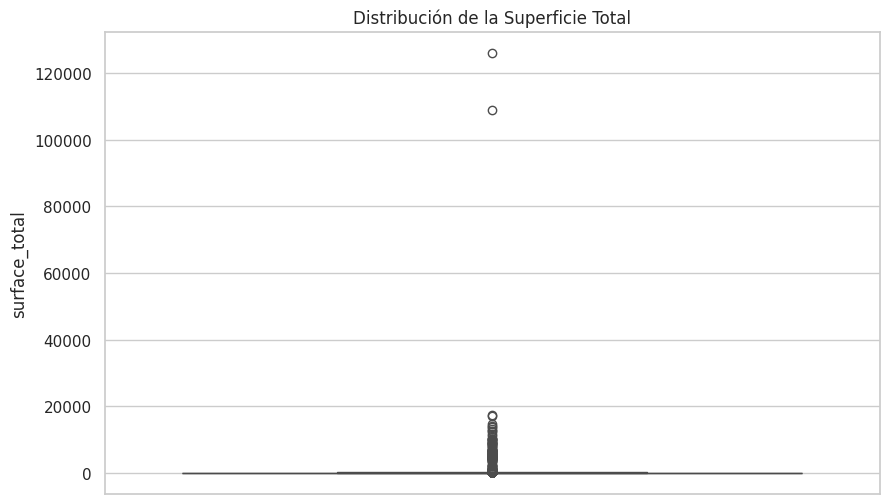

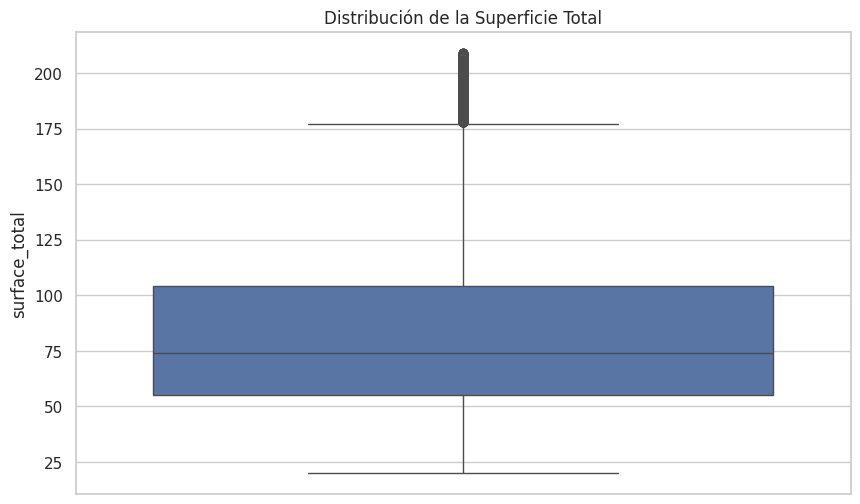

Límite superior para la superficie total: 209.5


In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=new_df, y="surface_total")
plt.title('Distribución de la Superficie Total')
plt.show()
# Cálculo del límite superior basado en el rango intercuartil (IQR)
Q1 = new_df['surface_total'].quantile(0.25)  # Primer cuartil (Q1)
Q3 = new_df['surface_total'].quantile(0.75)  # Tercer cuartil (Q3)
IQR = Q3 - Q1  # Rango intercuartil (IQR)

# Definir el límite superior como Q3 + 1.5 * IQR para eliminar valores atípicos
limit_surface_total = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar los valores atípicos
new_df_filtered = new_df[new_df['surface_total'] <= limit_surface_total]
# Crear el boxplot para visualizar la distribución de la superficie total
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_df_filtered, y="surface_total")
plt.title('Distribución de la Superficie Total')
plt.show()
# Imprimir el límite superior calculado
print(f"Límite superior para la superficie total: {limit_surface_total}")



La mayoría de las propiedades tienen superficies totales moderadas, y existen algunos valores atípicos que representan propiedades mucho más grandes. El límite superior calculado es adecuado para filtrar estos outliers, permitiendo centrarse en la mayoría de las propiedades con superficies más comunes.


    3. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor
    razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    sns.boxplot(data = df_nuevo, y = "price")
    sns.boxplot(data = df_nuevo, x = 'property_type', y = "price")
Escriban un análisis que les permita sacar alguna conclusión sobre el precio y las diferentes propiedades


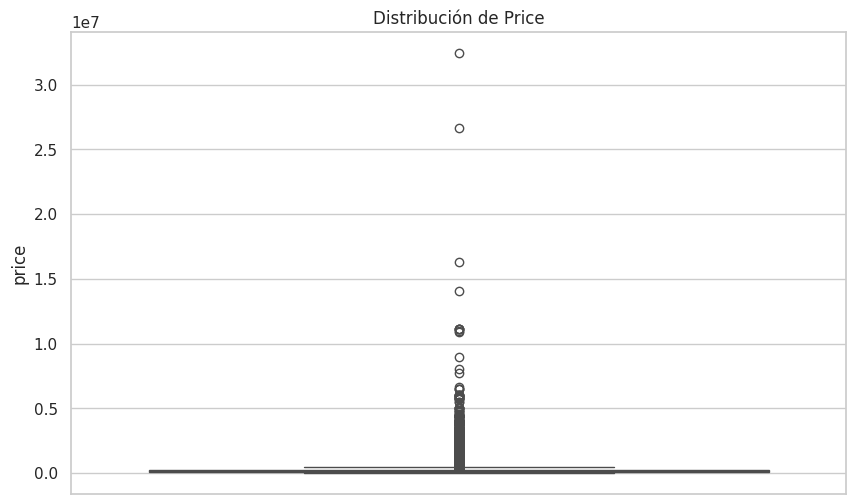

Límite superior para price: 496000.0


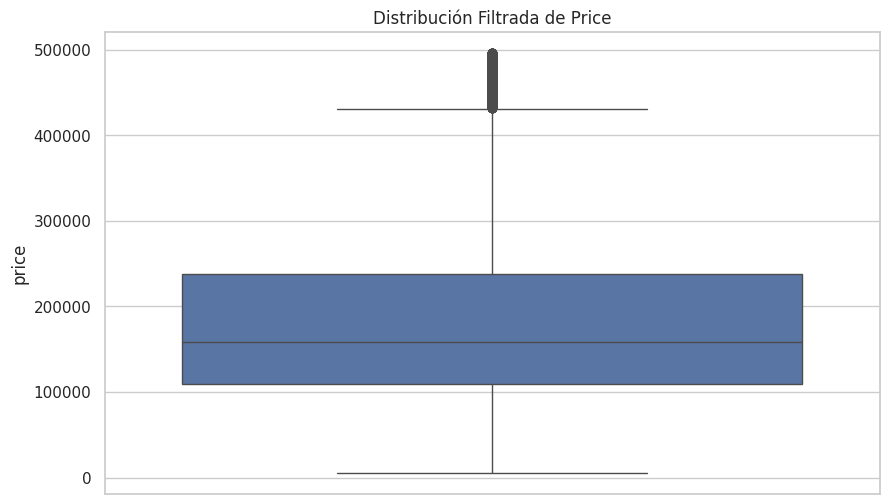

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Crear el boxplot para visualizar la distribución de 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y="price")
plt.title('Distribución de Price')
plt.show()
# Cálculo del límite superior basado en el rango intercuartil (IQR)
Q1 = df['price'].quantile(0.25)  # Primer cuartil (Q1)
Q3 = df['price'].quantile(0.75)  # Tercer cuartil (Q3)
IQR = Q3 - Q1  # Rango intercuartil (IQR)

# Definir el límite superior como Q3 + 1.5 * IQR para eliminar valores atípicos
limit_price = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar los valores atípicos
df_filtered_price = df[df['price'] <= limit_price]

# Imprimir el límite superior calculado
print(f"Límite superior para price: {limit_price}")

# Crear un nuevo boxplot con los datos filtrados
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered_price, y="price")
plt.title('Distribución Filtrada de Price')
plt.show()


La mayoría de las propiedades tienen precios entre 100,000 y 300,000, lo cual es el rango más común. Existen algunos valores atípicos que representan propiedades mucho más caras, y el límite superior calculado filtra adecuadamente estos valores para centrarse en la mayoría de las propiedades.

**Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

df_nuevo.corr()

Las correlaciones suelen graficarse en mapas de calor. Utilizá el siguiente código para generar un mapa de calor y sacar conclusiones sobre que variables tienen mayor correlación (más cercanas a 1)

plt.figure(figsize=(20,10))

sns.heatmap(df_nuevo.corr(),cmap='coolwarm',annot=True)

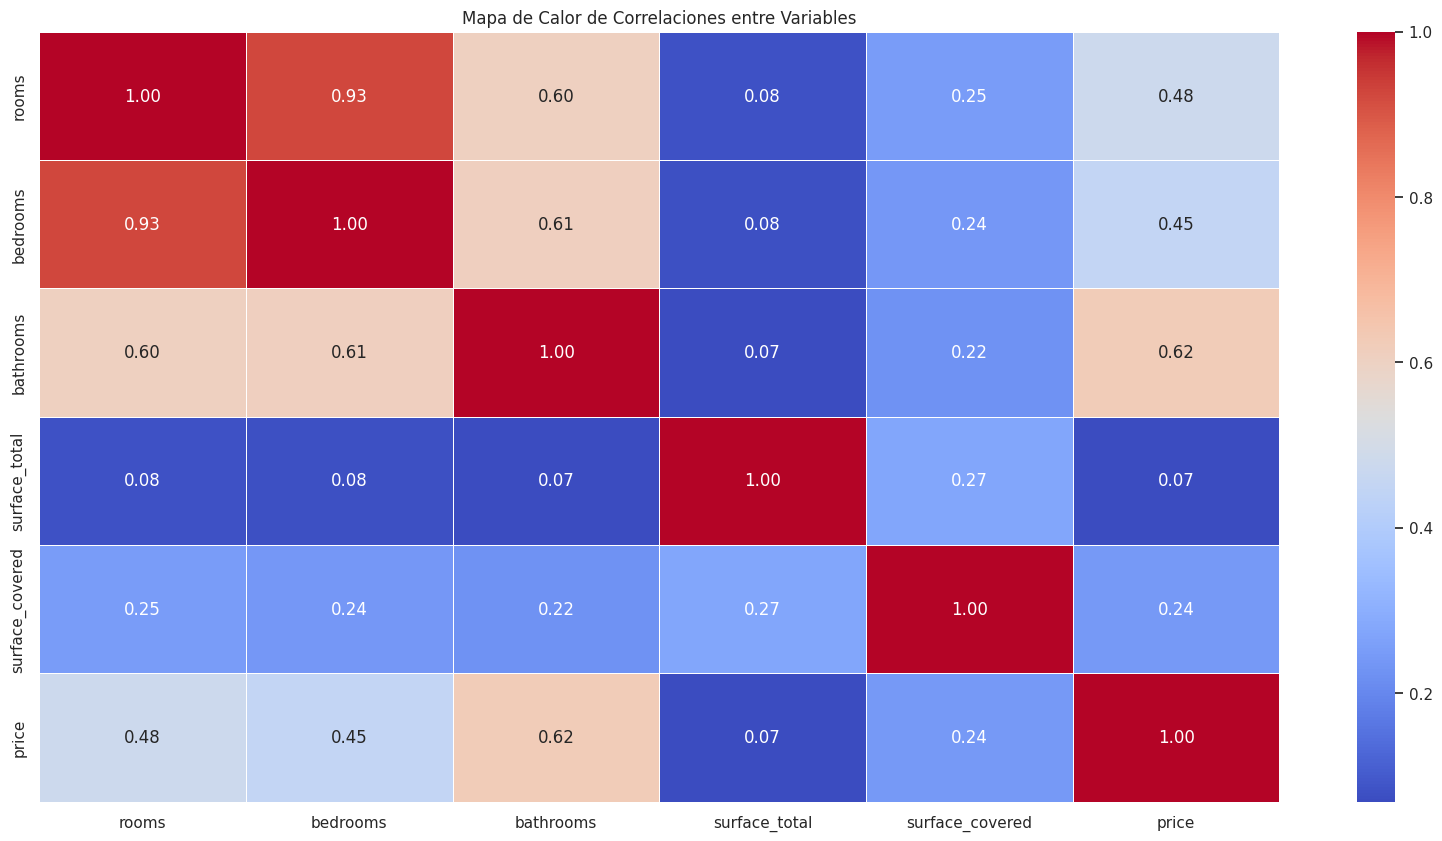

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = new_df[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].corr()

# Graficar el mapa de calor
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones entre Variables')
plt.show()


Las mejores variables para predecir el precio, aunque con correlaciones moderadas, son rooms y bedrooms. Las demás variables muestran correlaciones débiles, por lo que no parecen ser buenos predictores individuales del precio en este conjunto de datos. Se podria integrar un modelo predictivo de regresion para explorar las interacciones.
